In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)  # np.arange로 0부터 pi*2 까지, 0.1씩

# 정답은 np.sin(input_data) 로 미리 만들어 놓음
correct_data = np.sin(input_data)

# 전처리
input_data = (input_data - np.pi) / np.pi
n_data = len(correct_data)

In [3]:
n_in = 1
n_mid = 3
n_out = 1

# 이렇게 디자인함

In [4]:
# 이건 원래 렌덤하게 설정이 됨.  , 그러나 너무 버라이어티하게 나오면 안되니까, 폭(범위)를 좀 줄여줄 것
wb_width = 0.01
eta = 0.1

# 학습을 전체 몇바퀴를 돌릴 것이냐
epoch = 2001  # 짝수로 인터벌 주려고 2001 줌
interval = 200  # 200번 돌 떄마다 뭔가 출력을 주고싶어서 얘를 변수로 둠

In [5]:
# 은닉층 부터 (= 미들레이어 설계)
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 입력의 갯수와 똑같아야함, 출력은 컬럼과 강아야하고
        self.b = wb_width * np.random.randn(n)  # 얘는 한 행만 있으면 됨=n개만 있으면 됨
    
    #입력이 들어오면
    def forward(self, x):
        # 일단 들어온 입력을 내부 변수에 저장을 함
        self.x = x
        # 출력 u는 (입력값, 미리 정한 가중치),+ bias를 더함
        u = np.dot(x, self.w) + self.b
        # y는 시그모이드를 그대로 구현해주면 됨
        self.y = 1 / (1 + np.exp(-u))
        
    # 백워드 만들기
    # 이전층에서 미리 만든 출력의 기울기 y를 받음
    def backward(self, grad_y):
        # 델타는 grad_y에 시그모이드 함수 미분
        delta = grad_y * (1 - self.y) * self.y
        self.grad_w = np.dot(self.x.T, delta)  # delta와 matrix곱셈
        # bias 기울기 -> batch에 있는거 다 더함 => axis=0
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)  # 가중치에 전체 한것(self.w.T)을 matrix 곱셈
        
    # 가중치 업데이트
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    # 그 다음에 forward  ,  얘도 위에거 카피하고 활성함수만 바꾸면 됨(u)
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u
        
    # 그리고 백워드,  얘는 타겟(t)이 들어옴
    def backward(self, t):
        delta = self.y -t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T)
        
        
    # 그 다음 업데이트는, 진짜 똑같음(위에거랑)
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
        
    # 하면 정의 끝

In [7]:
# 각 클래스로 객체 생성

                        # (입력의 갯수, 출력의 갯수)
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

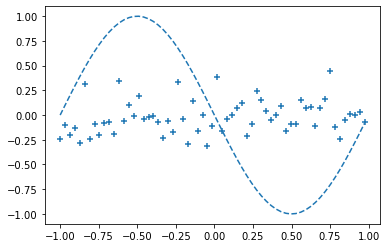

Epoch: 0/2001 Error: 0.28070985585697295


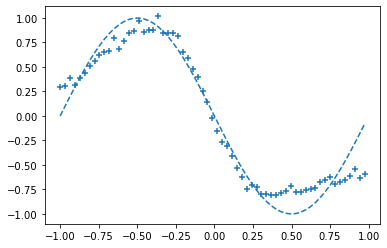

Epoch: 200/2001 Error: 0.012887977123870315


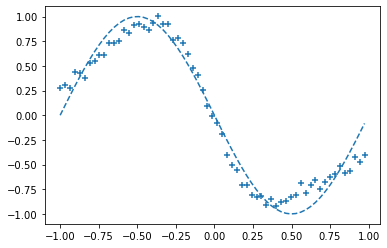

Epoch: 400/2001 Error: 0.0090990471977609


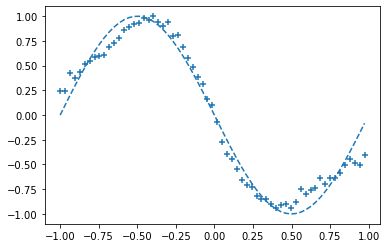

Epoch: 600/2001 Error: 0.007242788218883575


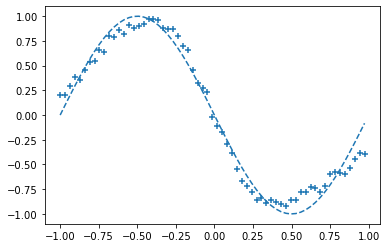

Epoch: 800/2001 Error: 0.005846696853119943


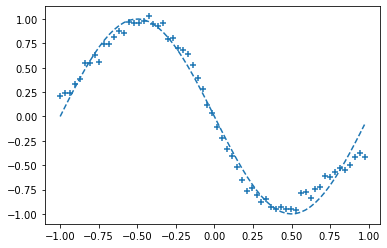

Epoch: 1000/2001 Error: 0.004833812590476684


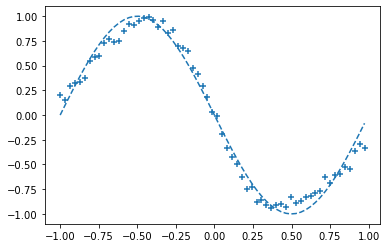

Epoch: 1200/2001 Error: 0.0043636851216494205


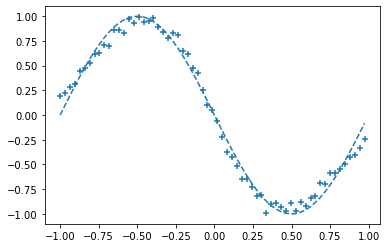

Epoch: 1400/2001 Error: 0.0032311766679591265


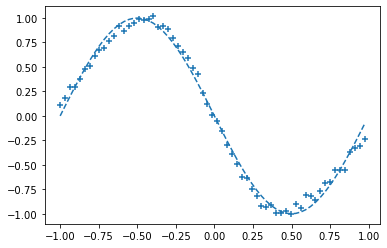

Epoch: 1600/2001 Error: 0.0020683697399813007


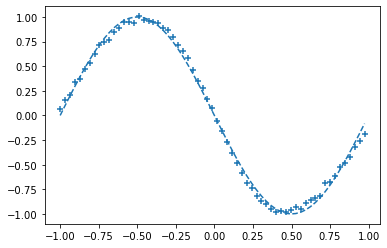

Epoch: 1800/2001 Error: 0.000972761961004384


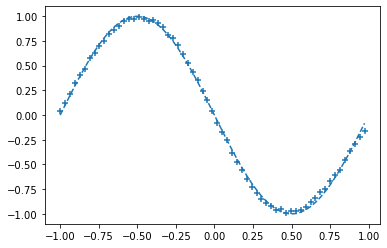

Epoch: 2000/2001 Error: 0.00035937350336025844


In [8]:
# 짝수가 되어야지 마지막이 나오니까
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)  # index를 random.shuffle로 확 섞어버린것
    
    # 결과 저장할 변수
    total_error = 0
    plot_x = []  # 빈 리스트 만들어 둠
    plot_y = []
    
    # 하나하나 끄집어서 순정파, 역전파 해야 할것 (?)
    for idx in index_random:
        x = input_data[idx:idx+1]  # x값을 하나만 갖고 오겠다는 뜻
        # 타겟
        t = correct_data[idx:idx+1]
        
        # 순정파 시켜봅시다
        middle_layer.forward(x.reshape(1,1)) # x가 들어가니까, 이 x를 그냥 넣으면 안되고 row하나, 컬럼하나의 행렬로 바꾸어줌
        output_layer.forward(middle_layer.y) # 출력을 y에 저장해둠 -> 그걸 입력으로 줌
        
        # 역정파.  이놈은 뒤에서부터지
        output_layer.backward(t.reshape(1, 1))  # t로 마찬가지로 행렬로 바꿔줘야함
        # 그 다음 미들레이어 -> 아웃풋레이어에서 미리 구해둔, grad_x를 넣어줌
        middle_layer.backward(output_layer.grad_x)
                              
        # 그 다음부터는 가중치만 수정하면 됨
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i % interval == 0:
            y = output_layer.y.reshape(-1)
                              
            # 오차 계산
            total_error += 1.0 / 2.0 * np.sum(np.square(y - t))
                              
            plot_x.append(x)
            plot_y.append(y)
            
    if i % interval == 0:
        # 그래프로 그릴 것
        plt.plot(input_data, correct_data, linestyle='dashed')
        plt.scatter(plot_x, plot_y, marker="+") #plot_x, plot_y를 찍어볼 것. 마커+로
        plt.show()
        
        # 찍고, Epoch 정보를 찍음
          # 전체 Epoch중에 몇번했다 <- 를 찍으려고 하는 것
        print("Epoch: " + str(i) + '/' + str(epoch),
              "Error: " + str(total_error / n_data))
              # 평균 에러 나옴

            
# 층도 중간 하나, 노드 수도 적고 해서 금방 나옴